In [ ]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.io import imread
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import pickle

In [2]:
Categories=['참외정상','참외질병16','참외질병17']

flat_data_arr=[]
target_arr=[]
#please use datadir='/content' if the files are upload on to google collab
#else mount the drive and give path of the parent-folder containing all category images folders.
datadir='C:/Users/Yunji Noh/OneDrive/문서/머신테스트/시설 작물 질병 진단 이미지/Training'
for i in Categories:
  print(f'loading... category : {i}')
  path=os.path.join(datadir,i)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data_arr.append(img_resized.flatten())
    target_arr.append(Categories.index(i))
  print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data)
df['Target']=target
df

loading... category : 참외정상
loaded category:참외정상 successfully
loading... category : 참외질병16
loaded category:참외질병16 successfully
loading... category : 참외질병17
loaded category:참외질병17 successfully


,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Target
0,0.701961,0.560784,3.254902e-01,0.874510,0.741176,5.019608e-01,0.768627,0.635294,0.396078,0.894118,...,0.631373,0.470588,0.360784,0.713725,0.576471,0.490196,0.521569,0.384314,0.305882,0
1,0.819608,0.858824,3.686275e-01,0.807843,0.854902,4.549020e-01,0.733333,0.807843,0.486275,0.635294,...,0.556863,0.447059,0.364706,0.572549,0.447059,0.349020,0.545098,0.423529,0.309804,0
2,0.643137,0.737255,2.666667e-01,0.607843,0.709804,3.215686e-01,0.560784,0.674510,0.313725,0.517647,...,0.345098,0.235294,0.180392,0.380392,0.270588,0.215686,0.392157,0.282353,0.227451,0
3,0.180392,0.109804,6.798919e-15,0.517647,0.423529,2.745098e-01,0.341176,0.223529,0.082353,0.419608,...,0.427451,0.333333,0.286275,0.419608,0.305882,0.243137,0.411765,0.290196,0.211765,0
4,0.427451,0.494118,3.343731e-16,0.525490,0.556863,3.343731e-16,0.576471,0.592157,0.015686,0.392157,...,0.286275,0.188235,0.066667,0.337255,0.235294,0.129412,0.376471,0.266667,0.172549,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,0.349020,0.490196,2.470588e-01,0.349020,0.490196,2.392157e-01,0.368627,0.509804,0.258824,0.356863,...,0.737255,0.725490,0.423529,0.564706,0.596078,0.301961,0.537255,0.600000,0.321569,2
198,0.533333,0.631373,6.078431e-01,0.525490,0.631373,6.117647e-01,0.556863,0.654902,0.639216,0.537255,...,0.254902,0.392157,0.313725,0.407843,0.545098,0.458824,0.301961,0.435294,0.341176,2
199,0.584314,0.694118,5.960784e-01,0.525490,0.658824,5.294118e-01,0.384314,0.537255,0.360784,0.305882,...,0.223529,0.235294,0.207843,0.278431,0.286275,0.266667,0.290196,0.301961,0.274510,2
200,0.321569,0.494118,2.470588e-01,0.345098,0.533333,2.352941e-01,0.407843,0.592157,0.274510,0.411765,...,0.588235,0.752941,0.360784,0.552941,0.717647,0.333333,0.505882,0.678431,0.305882,2


In [3]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully


In [4]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['poly']}
svc=svm.SVC(probability=True)
print("The training of the model is started, please wait for while as it may take few minutes to complete")
model=GridSearchCV(svc,param_grid)
print(model)
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
model.best_params_

The training of the model is started, please wait for while as it may take few minutes to complete
GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1], 'kernel': ['poly']})
The Model is trained well with the given images


{'C': 0.1, 'gamma': 0.001, 'kernel': 'poly'}

In [5]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
y_pred

The predicted Data is :


array([1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 0, 0, 1,
       0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0])

In [6]:
print("The actual data is:")
np.array(y_test)

The actual data is:


array([1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 2, 1, 2, 2, 2, 1, 1, 0, 2, 2, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0])

In [7]:
#classification_report(y_pred,y_test)
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")
#confusion_matrix(y_pred,y_test)

The model is 80.48780487804879% accurate


In [8]:
pickle.dump(model,open('img_model.p','wb'))
print("Pickle is dumped successfully")

Pickle is dumped successfully


Enter URL of Imagehttps://t1.daumcdn.net/cfile/tistory/214BD7415831A01515


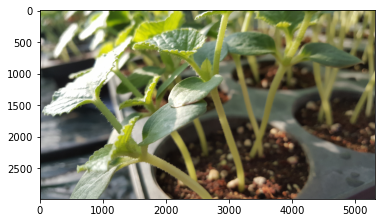

참외정상 = 99.54893335253337%
참외질병16 = 0.2791195812186215%
참외질병17 = 0.17194706624799508%
The predicted image is : 참외정상
Is the image a 참외정상 ?(y/n)
y
Thank you for your feedback


In [10]:
 #test the model
    
#print(os.path.abspath(os.getcwd()))
model=pickle.load(open('img_model.p','rb'))

url=input('Enter URL of Image')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
  print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])
print(f'Is the image a {Categories[model.predict(l)[0]]} ?(y/n)')
while(True):
  b=input()
  if(b=="y" or b=="n"):
    break
  print("please enter either y or n")

if(b=='n'):
  print("What is the image?")
  for i in range(len(Categories)):
    print(f"Enter {i} for {Categories[i]}")
  k=int(input())
  while(k<0 or k>=len(Categories)):
    print(f"Please enter a valid number between 0-{len(Categories)-1}")
    k=int(input())
  print("Please wait for a while for the model to learn from this image :)")
  flat_arr=flat_data_arr.copy()
  tar_arr=target_arr.copy()
  tar_arr.append(k)
  flat_arr.extend(l)
  tar_arr=np.array(tar_arr)
  flat_df=np.array(flat_arr)
  df1=pd.DataFrame(flat_df)
  df1['Target']=tar_arr
  model1=GridSearchCV(svc,param_grid)
  x1=df1.iloc[:,:-1]
  y1=df1.iloc[:,-1]
  x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.20,random_state=77,stratify=y1)
  d={}
  for i in model.best_params_:
    d[i]=[model.best_params_[i]]
  model1=GridSearchCV(svc,d)
  print(f"The model is now {accuracy_score(y_pred1,y_test1)*100}% accurate")
  pickle.dump(model1,open('img_model.p','wb'))
print("Thank you for your feedback")

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(3))